# Regression problem

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples = 50,n_features=5)

In [7]:
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4
0,-0.517626,0.822980,-0.154713,0.713812,-0.795075
1,0.009744,-2.215260,-1.124785,0.158787,1.275695
2,-1.266289,-0.242532,1.325752,0.832314,-0.120680
3,-0.256633,1.452428,0.098158,1.465998,0.169389
4,-0.573127,0.890895,-0.367259,-0.096365,0.166273


In [8]:
y[:5]

array([  23.3910403 , -166.65165647,  -64.46234747,  111.49664626,
         31.93068654])

In [11]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [13]:
fs = SelectKBest(score_func=mutual_info_regression,k=3)

In [14]:
fs.fit(x,y)

SelectKBest(k=3,
            score_func=<function mutual_info_regression at 0x0000021F177FD750>)

In [15]:
fs.scores_

array([0.01186266, 0.66844041, 0.        , 0.06728269, 0.        ])

In [17]:
mi_scores = pd.Series(fs.scores_,index=x.columns)
mi_scores

0    0.011863
1    0.668440
2    0.000000
3    0.067283
4    0.000000
dtype: float64

<AxesSubplot:>

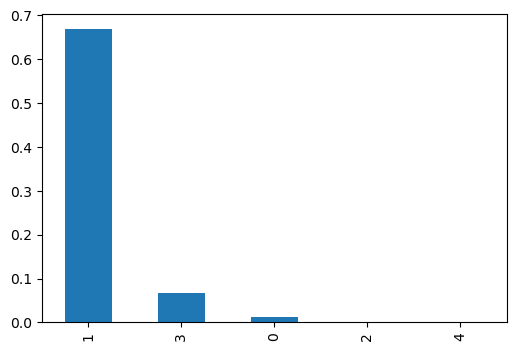

In [19]:
mi_scores.sort_values(ascending=False).plot.bar(figsize=(6, 4))

In [22]:
x_selected = fs.fit_transform(x,y)
x_selected = pd.DataFrame(x_selected)

In [23]:
x_selected.head()

,0,1,2
0,-0.517626,0.822980,0.713812
1,0.009744,-2.215260,0.158787
2,-1.266289,-0.242532,0.832314
3,-0.256633,1.452428,1.465998
4,-0.573127,0.890895,-0.096365


# Classification Problem

In [24]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif

In [27]:
x,y = make_classification(n_samples = 50,n_features=5,n_informative=2)
x= pd.DataFrame(x)

In [28]:
x.head()

,0,1,2,3,4
0,0.990153,-2.614857,-1.024926,-0.412521,1.388237
1,-1.075022,1.658310,-0.586989,-0.132670,-0.151792
2,-1.264135,1.413628,0.626242,0.293635,-1.228297
3,-0.771804,0.774438,1.283537,0.487074,-1.468557
4,-0.152096,-0.474507,2.128815,0.736684,-1.785271


In [29]:
y[:5]

array([0, 0, 1, 1, 1])

<AxesSubplot:>

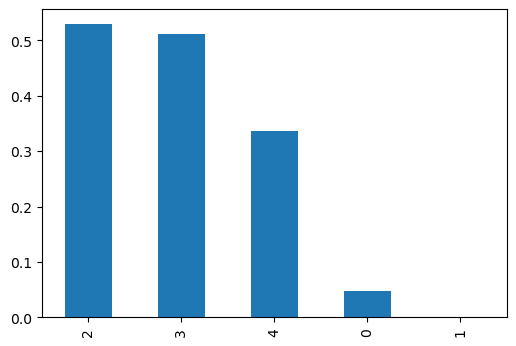

In [31]:
fs = SelectKBest(score_func=mutual_info_classif,k=3)
fs.fit(x,y)
mi_scores = pd.Series(fs.scores_,index=x.columns)
mi_scores.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [32]:
selected_x = fs.fit_transform(x,y)
selected_x = pd.DataFrame(selected_x)

In [34]:
#before
x.head()

,0,1,2,3,4
0,0.990153,-2.614857,-1.024926,-0.412521,1.388237
1,-1.075022,1.658310,-0.586989,-0.132670,-0.151792
2,-1.264135,1.413628,0.626242,0.293635,-1.228297
3,-0.771804,0.774438,1.283537,0.487074,-1.468557
4,-0.152096,-0.474507,2.128815,0.736684,-1.785271


In [35]:
selected_x.head()  #after

,0,1,2
0,-1.024926,-0.412521,1.388237
1,-0.586989,-0.132670,-0.151792
2,0.626242,0.293635,-1.228297
3,1.283537,0.487074,-1.468557
4,2.128815,0.736684,-1.785271
